# **Introduction 😋**
- This notebook shows the steps to train the Vietnamese recognition model based on PaddleOCR.
 - First, download the source code from PaddleOCR's github homepage: https://github.com/PaddlePaddle/PaddleOCR.git
 - Unzip file and upload to ggdrive or the location you want to train (kaggle,..).
 - Before starting this note please mount to the folder PaddleOCR
 - To avoid error during traning, let put your path to ggdrive in code carefully. If you use another method to training (kaggle, local machine,...), please put paths to directoty or file according to that method.
 - Config file .yml before tranning (paths in this file must point to directory or file based on method that you want to use).
- If you have any question, please don't hesitate to contact me via email: minh9thanh@gmail.com
 ```
#on ggdrive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PaddleOCR/
 ```
```
#on kaggle
%cd /kaggle/working/PaddleOCR
```
```
# Reference link kaggle
https://www.kaggle.com/code/thanhpython/train
```



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Part 1: Install libraries**
 - List GPU
 - Unzip dataset
 - Install libraries
 - Download libssl1.1.1.1 for ubuntu if it has error during run trainning

### 1. List GPU on Google Colab

In [1]:
!nvidia-smi

Thu Sep 21 01:52:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Unzip your dataset if you need

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/
!unzip "/content/drive/MyDrive/PaddleOCR/{your_file_data}.zip" -d "/content/drive/MyDrive/PaddleOCR"

### 3. Install libraries

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/
!pip install -r requirements.txt
!pip install paddlepaddle-gpu==2.4.2

### 4. Download libssl1.1.1.1 for ubuntu if it has error during run trainning

In [6]:
%cd /content/drive/MyDrive/PaddleOCR/
# !wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb (uncommend if you are first time to tran model)
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

/content/drive/MyDrive/PaddleOCR
Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic 

# **Part 2: Training model and evaluate model**
 - Config file file_name.yaml in folder config --> rec
 - Refer to https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.7/doc/doc_en/config_en.md to config
 - Tranning model
 - Evaluate model after tranning
 - Test on image
 - Export inference model

### 1. Traning model

In [ ]:
!python3 /content/drive/MyDrive/PaddleOCR/tools/train.py -c /content/drive/MyDrive/PaddleOCR/configs/rec/rec_svtr_tiny_3.yml

### 2. Evaluate model after trainning

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/

In [ ]:
!python3 -m paddle.distributed.launch --gpus '0' tools/eval.py -c /content/drive/MyDrive/PaddleOCR/configs/rec/rec_svtr_tiny_3.yml \
-o Global.checkpoints=/content/drive/MyDrive/PaddleOCR/output/rec/best_model/model.pdparams \
Global.character_type=vi  \
Global.character_dict_path=/content/drive/MyDrive/PaddleOCR/ppocr/utils/dict/vi_vietnam.txt


### 3. Test on image

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/
from google.colab.patches import cv2_imshow
import os
import cv2

path = '/content/drive/MyDrive/PaddleOCR/doc/imgs_words/vi/word_9.jpg'
img = cv2.imread(path)
!python3 tools/infer_rec.py -c /content/drive/MyDrive/PaddleOCR/configs/rec/rec_svtr_tiny_3.yml \
                            -o Global.pretrained_model=/content/drive/MyDrive/PaddleOCR/output/rec/best_model/model Global.infer_img=./doc/imgs_words/vi/word_9.jpg
cv2_imshow(img)

### 4. Export inference model

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/

/content/drive/MyDrive/PaddleOCR


In [ ]:
!python3 tools/export_model.py -c configs/rec/rec_svtr_tiny_1.yml -o Global.pretrained_model=/content/drive/MyDrive/PaddleOCR/output/rec/rec_svtr_tiny_en/best_accuracy  Global.save_inference_dir=./inference/SVTR_Tiny/

In [ ]:
!python3 tools/infer/predict_rec.py --image_dir='./doc/imgs_words/vi/word_7.jpg' --rec_model_dir='./inference/rec/' --rec_algorithm='SVTR' --rec_image_shape='3,48,480' --rec_char_dict_path='./ppocr/utils/dict/vi_vietnam.txt'

# **Part 3: Draw chart accuracy and loss, test model on cropped images**
 - You write code in program.py file (tools --> program.py) to save accuracy and loss during tranning. You can refer to this file and modify if you need:
 https://drive.google.com/drive/u/3/folders/1-a8j4ZyHPKbpc-X0qDR6eFXQlYEWk8-X
 - Draw chart accuracy and loss
 - Test model on cropped images

### 1. Draw chart accuracy and loss

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
# import matplotlib.ticker as t

def draw(type):
  """
    Draw flow chart of trainning accuracy, loss,  and validation accuracy
    Input: type to draw ['acc_train', 'loss', 'acc_validation']
    Ouput: Graph
  """
  if type == 'acc_train':
    data = pd.read_csv('/content/drive/MyDrive/PaddleOCR/result_parameter.csv')
    x_axis = data.iloc[:, 0]
    y_axis = data.iloc[:, 1:3]
    title = 'Trainning accuracy and norm edit dis'
    l = ['accuracy', 'norm edit dis']
    y_label = 'Accuracy and norm edit dis'

  if type == 'loss':
    data = pd.read_csv('/content/drive/MyDrive/PaddleOCR/result_parameter.csv')
    x_axis = data.iloc[:, 0]
    y_axis = data.iloc[:, -1]
    title = 'Loss'
    l = ['loss']
    y_label = 'Loss'

  if type == 'acc_validation':
    data = pd.read_csv('/content/drive/MyDrive/PaddleOCR/result_accuracy.csv')
    x_axis = data.iloc[:, 0]
    y_axis = data.iloc[:, 1:3]
    title = 'Validation accuracy and norm edit dis'
    l = ['accuracy', 'norm edit dis']
    y_label = 'Accuracy and norm edit dis'

  fig, ax = plt.subplots()
  fig.set_size_inches(10, 5)

  ax.set_title(title)
  ax.set_xlabel('No. epochs')
  ax.set_ylabel(y_label)
  ax.plot(x_axis, y_axis)

  plt.legend(l, loc='upper right')
  plt.show()
  print()

In [ ]:
# draw train accuracy
draw('acc_train')
# draw train loss
draw('loss')
# draw validation accuracy
draw('acc_validation')

### 2. Test model on cropped images
* You should create a folder that contains cropped image like
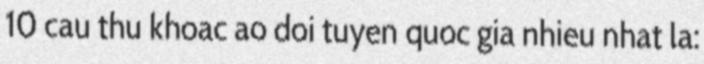



In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/

/content/drive/MyDrive/PaddleOCR


In [ ]:
# Load customizied model
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(det_model_dir='/content/drive/MyDrive/PaddleOCR/inference/det',
                rec_model_dir='/content/drive/MyDrive/PaddleOCR/inference/rec',
                rec_char_dict_path='/content/drive/MyDrive/PaddleOCR/ppocr/utils/dict/vi_vietnam.txt',
                max_text_length=128, use_angle_cls=False)

In [ ]:
from google.colab.patches import cv2_imshow
import os
import cv2

folder = '/content/drive/MyDrive/PaddleOCR/doc/imgs_words/vi'
for f in os.listdir(folder):
  file_path = folder + '/' + f
  res = ocr.ocr(file_path, det=False, cls=False)
  print(res[0][0], end='   ')
  img = cv2.imread(file_path)
  cv2_imshow(img)


# **Part 4: Compare SVTR-Tiny with VietOCR**
 - Test prescription with SVTR-Tiny
 - Test prescription with VietOCR
 - Plot two image after predicting to compare

## 1. Test prescription with SVTR-Tiny

### 1.1 Test on one image

In [ ]:
# Load customizied model
from PIL import Image
from paddleocr import PaddleOCR,draw_ocr

ocr = PaddleOCR(det_model_dir='/content/drive/MyDrive/PaddleOCR/inference/det',
                rec_model_dir='/content/drive/MyDrive/PaddleOCR/inference/rec',
                rec_char_dict_path='/content/drive/MyDrive/PaddleOCR/ppocr/utils/dict/vi_vietnam.txt',
                max_text_length=128, use_angle_cls=False)

In [ ]:
from PIL import Image

img_path = '/content/drive/MyDrive/PaddleOCR/image/prescription_1.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
img1 = img.copy()

result = ocr.ocr(img_path, det=True, cls=False)
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

for box in boxes:
    top_left = (int(box[0][0]), int(box[0][1]))
    bottom_right = (int(box[2][0]), int(box[2][1]))

    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

results = []
boxes_1 = []
scores = []
for box in boxes:
  x = (int(box[0][0]-1), int(box[2][0]+1))
  y = (int(box[0][1]-1), int(box[2][1]+1))
  text = img1[y[0]:y[1], x[0]:x[1]]

  result = ocr.ocr(text, det=False, cls=False)
  text = result[0][0][0]
  if len(text) >= 2 and text[0] != ' ':
      results.append(result[0][0][0])
      scores.append(result[0][0][1])
      boxes_1.append(box)

for r in results:
  print(r)
im_show = draw_ocr(image, boxes_1, results, scores,
                   font_path='/content/drive/MyDrive/PaddleOCR/doc/fonts/latin.ttf')

cv2_imshow(im_show)

### 1.2 Test on test folder

In [ ]:
path = '/content/drive/MyDrive/PaddleOCR/image'

for file_name in os.listdir(path):
  img_path = path+'/'+file_name
  result = ocr.ocr(img_path, det=True, cls=False)
  image = Image.open(img_path).convert('RGB')
  boxes = [line[0] for line in result[0]]
  txts = [line[1][0] for line in result[0]]
  scores = [line[1][1] for line in result[0]]


  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  for box in boxes:
      top_left = (int(box[0][0]), int(box[0][1]))
      bottom_right = (int(box[2][0]), int(box[2][1]))

      cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
  cv2_imshow(img)

In [ ]:
from PIL import Image
path = '/content/drive/MyDrive/PaddleOCR/image'

for file_name in os.listdir(path):
  img_path = path+'/'+file_name
  result = ocr.ocr(img_path, det=True, cls=True)
  image = Image.open(img_path).convert('RGB')
  boxes = [line[0] for line in result[0]]
  txts = [line[1][0] for line in result[0]]
  scores = [line[1][1] for line in result[0]]

  im_show = draw_ocr(image, boxes, txts, scores,font_path='/content/drive/MyDrive/PaddleOCR/doc/fonts/latin.ttf')

  cv2_imshow(im_show)


## 2. Test prescription with VietOCR


### 2.1 Install libraries for runnining model VietOCR

In [ ]:
!pip install torch
!pip install torchvision
!pip install vietocr

In [ ]:
from google.colab.patches import cv2_imshow
img_path = '/content/drive/MyDrive/PaddleOCR/image/prescription_1.png'
img = cv.imread(img_path, cv.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/

In [ ]:
from PIL import Image
import numpy as np

ocr1 = PaddleOCR(det_model_dir='/content/drive/MyDrive/PaddleOCR/inference', lang='en')
image = Image.open(img_path).convert('RGB')
result = ocr1.ocr(img_path, det=True, cls=True)
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

### 2.2 Load model VietOCR and predict

In [ ]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import cv2 as cv
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = '/content/drive/MyDrive/PaddleOCR/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

detector = Predictor(config)

In [ ]:
results = []
img_path = '/content/drive/MyDrive/PaddleOCR/image/prescription_1.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
for box in boxes:
    text = img[int(box[0][1]):int(box[2][1]), int(box[0][0]):int(box[2][0])]
    text = Image.fromarray(text, 'RGB')
    result = detector.predict(text)
    results.append(result)
    print(result)
im_show2 = draw_ocr(image, boxes, results, scores,
                   font_path='/content/drive/MyDrive/PaddleOCR/doc/fonts/latin.ttf')
cv2_imshow(im_show2)

## 3. Plot two image after predicting to compare

In [ ]:
import matplotlib.pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 10))

# Adds a subplot at the 1st position
fig.add_subplot(2, 1, 1)

# showing image
plt.imshow(im_show)
plt.axis('off')
plt.title("SVTR")

# Adds a subplot at the 2nd position
fig.add_subplot(2, 1, 2)

# showing image
plt.imshow(im_show2)
plt.axis('off')
plt.title("VietOCR")

# **Part 5: Using Word Eror Rate and Character Error Rate to evaluate validation dataset**
 - Evaluate with model SVTR-Tiny
 - Evaluate with model VietOCR

In [ ]:
!pip install torchmetrics

## 1. Evaluate with model SVTR-Tiny

### 1.1 Calculate WER and CER

In [ ]:
from torchmetrics.text import WordErrorRate, CharErrorRate
import os
import csv
import random

root = '/content/drive/MyDrive/PaddleOCR/dataset/'
wer = WordErrorRate()
cer = CharErrorRate()
list_error = []
with open('/content/drive/MyDrive/PaddleOCR/dataset/test.txt', 'r', encoding='utf-8') as f:
  for line in f:
    text = line.strip().split('\t')[-1]
    path = line.strip().split('\t')[0]

    res = ocr.ocr(root+path, det=False, cls=False)

    word_error = wer(res[0][0][0], text)
    character_error = cer(res, text)
    list_error.append([text, res[0][0][0], str(float(word_error)), str(float(character_error))])

random.shuffle(list_error)
filename = '/content/drive/MyDrive/PaddleOCR/error.csv'
file_exists = os.path.isfile(filename)
with open (filename, 'a', encoding='utf-8') as csvfile:
    headers = ['Target sentence', 'Prediced sentence', 'Word error rate', 'Character error rate']
    writer = csv.writer(csvfile)
    if not file_exists:
        writer.writerow(headers)
    writer.writerows(list_error)

### 1.2 Calculate percent of sentences that have rate WER and CER < 10%

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/PaddleOCR/error.csv')
filter1 = data[data['Word error rate'] < 0.1].count()
filter2 = data[data['Character error rate'] < 0.1].count()

print(filter1['Word error rate']/2000*100)
print(filter2['Character error rate']/2000*100)

## 2. Evaluate with model VietOCR

### 2.1 Calculate WER and CER

In [ ]:
from torchmetrics.text import WordErrorRate, CharErrorRate
import os
import csv
import random

root = '/content/drive/MyDrive/PaddleOCR/dataset/'
wer = WordErrorRate()
cer = CharErrorRate()
list_error = []
with open('/content/drive/MyDrive/PaddleOCR/dataset/test.txt', 'r', encoding='utf-8') as f:
  for line in f:
    text = line.strip().split('\t')[-1]
    path = line.strip().split('\t')[0]
    img = cv.imread(root+path)
    img = Image.fromarray(img, 'RGB')

    res = detector.predict(img)
    word_error = wer(res, text)
    character_error = cer(res, text)
    list_error.append([text, res, str(float(word_error)), str(float(character_error))])

random.shuffle(list_error)
filename = '/content/drive/MyDrive/PaddleOCR/error_VietOCR.csv'
file_exists = os.path.isfile(filename)
with open (filename, 'a', encoding='utf-8') as csvfile:
    headers = ['Target sentence', 'Prediced sentence', 'Word error rate', 'Character error rate']
    writer = csv.writer(csvfile)
    if not file_exists:
        writer.writerow(headers)
    writer.writerows(list_error)

### 2.2 Calculate percent of sentences that have rate WER and CER < 10%

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/PaddleOCR/error_VietOCR.csv')
filter1 = data[data['Word error rate'] < 0.1].count()
filter2 = data[data['Character error rate'] < 0.1].count()

print(filter1['Word error rate']/2000*100)
print(filter2['Character error rate']/2000*100)

# **Part 6: Evaluate WER and CER in prescriptions dataset(on going)**
  - Evaluate with model SVTR-Tiny
  - Evaluate with model VietOCR

## 1. Evaluate with model SVTR-Tiny

In [ ]:
%cd /content/drive/MyDrive/PaddleOCR/

/content/drive/MyDrive/PaddleOCR


In [ ]:
# Load customizied model
from PIL import Image
from paddleocr import PaddleOCR,draw_ocr

ocr = PaddleOCR(det_model_dir='/content/drive/MyDrive/PaddleOCR/inference/det',
                rec_model_dir='/content/drive/MyDrive/PaddleOCR/inference/rec',
                rec_char_dict_path='/content/drive/MyDrive/PaddleOCR/ppocr/utils/dict/vi_vietnam.txt',
                max_text_length=128, use_angle_cls=False)

In [ ]:
from google.colab.patches import cv2_imshow
import os
import cv2 as cv

folder = '/content/drive/MyDrive/PaddleOCR/data'

for file_name in os.listdir(folder):
  img = cv.imread(folder +'/' + file_name)
  cv2_imshow(img)

In [ ]:
import json

dic = {}
for file_name in os.listdir(folder):
  pre = file_name.split('.')[0]

  img_path = folder + '/' + file_name
  result = ocr.ocr(img_path, det=True, cls=False)
  image = Image.open(img_path).convert('RGB')
  boxes = [line[0] for line in result[0]]
  txts = [line[1][0] for line in result[0]]
  with open('/content/drive/MyDrive/PaddleOCR/test.json', 'w', encoding=)



In [1]:
!pip3 install paddleslim==2.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.1/381.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.3 MB/s eta 0:00:00
  Created wheel for smac: filename=smac-2.0.2-py3-none-any.whl size=207414 sha256=697ad4d02197425164204388a7c3c699ccc0764876bb08c88c9fae716dbd96e2
  Stored in directory: /root/.cache/pip/wheels/9e/7b/0f/70fa

In [ ]:
# download provided model
!wget https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_det_distill_train.tar
!tar xf ch_PP-OCRv3_det_distill_train.tar

python deploy/slim/quantization/quant.py -c configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_cml.yml -o Global.pretrained_model='./ch_PP-OCRv3_det_distill_train/best_accuracy'   Global.save_model_dir=./output/quant_model_distill/